# Escalation Status Visualizations

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

Setup

In [2]:
import pandas as pd
import numpy as np
from scipy import stats
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from plotnine import ggplot, geom_point, aes, stat_smooth, facet_wrap
from pyparsing.util import col

In [3]:
def getPivot(dataframe, indexCol):
    dfPivot = dataframe.copy(); 
    if indexCol == "Date":
        dfPivot[indexCol] = pd.to_datetime(dfPivot[indexCol], format='%Y-%m');
    dfPivot.index = dfPivot[indexCol];
    del dfPivot[indexCol];
    return dfPivot;

In [4]:
def getTransposedDataframe(dataframe, hueColumn, xColumn):
  data = [];
  for i in range(len(dataframe[hueColumn].unique().tolist())):
    for j in range(len(dataframe.columns.tolist()[1:])):
      row = [dataframe[hueColumn].unique().tolist()[i]];
      row.append(dataframe.columns.tolist()[1:][j]);
      row.append(dataframe.loc[i, dataframe.columns.tolist()[1:][j]]);
      data.append(row);
  dfTransposed = pd.DataFrame(data, columns=[hueColumn,xColumn,"Total Cases"]);
  return dfTransposed;

In [5]:
# escalationStatusDataPath = "/content/drive/MyDrive/Coursework/Co-op Winter 2022/2021 SHS Statistics Analysis/Escalation Status data.xlsx";
escalationStatusDataPath = "3_analyzedData/Escalation Status data.xlsx"

Escalation Status

([<matplotlib.patches.Wedge at 0x7fc078a4c310>,
 [Text(-1.0176843076498796, 0.4175148499912134, 'No'),
  Text(1.0176843271951592, -0.41751480234997235, 'Yes')],
 [Text(-0.5551005314453888, 0.22773537272248, '88%'),
  Text(0.5551005421064504, -0.22773534673634852, '12%')])

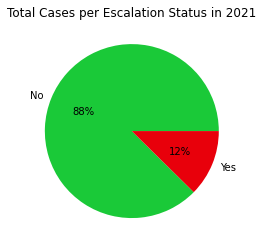

In [6]:
df_escalationStatus = pd.read_excel(escalationStatusDataPath, sheet_name="Escalation Status");

def getPieChart_EscalationStatus(dataframe_escalationStatus):
  colors = sns.color_palette('bright')[2:4]
  chart = plt.pie(dataframe_escalationStatus["Total Cases"], labels=dataframe_escalationStatus["Escalated to SD?"], colors=colors, autopct='%.0f%%');
  plt.title(f"Total Cases per Escalation Status in 2021");
  return chart;

getPieChart_EscalationStatus(df_escalationStatus)

<AxesSubplot:title={'center':'Total Cases per Escalation Status in 2021'}, xlabel='Escalated to SD?', ylabel='Total Cases'>

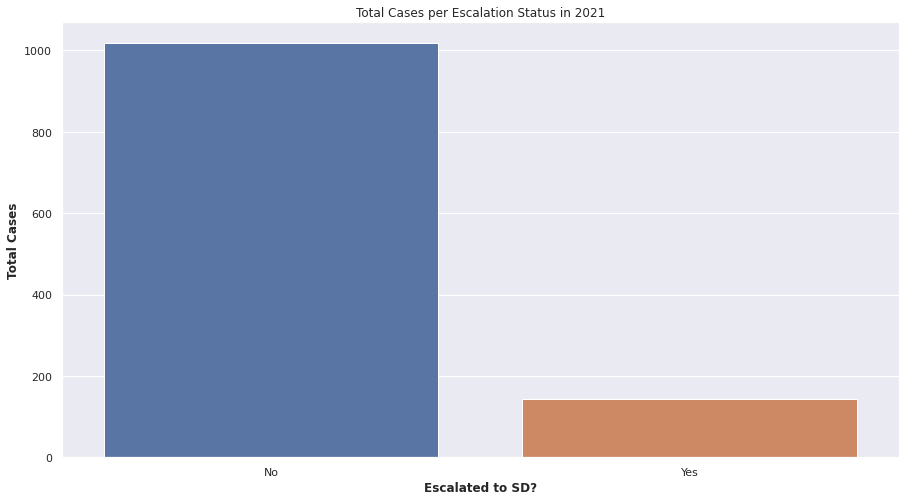

In [7]:
def getBarChart_EscalationStatus(dataframe_escalationStatus, xColumn):
  dataframePivot_escalationStatus = getPivot(dataframe_escalationStatus, xColumn);
  with sns.axes_style("darkgrid"):
      sns.set(rc = {'figure.figsize':(15,8)});
      chart = sns.barplot(data=dataframe_escalationStatus, x=xColumn, y="Total Cases");
      plt.xlabel(xColumn, fontweight="bold");
      plt.ylabel("Total Cases", fontweight="bold");
      plt.title(f"Total Cases per Escalation Status in 2021");
      # plt.legend(title="Escalation Status");
  return chart;

getBarChart_EscalationStatus(df_escalationStatus, "Escalated to SD?")

Semester

<AxesSubplot:title={'center':'Total Cases per Escalation Status by Semester in 2021'}, xlabel='Semester', ylabel='Total Cases'>

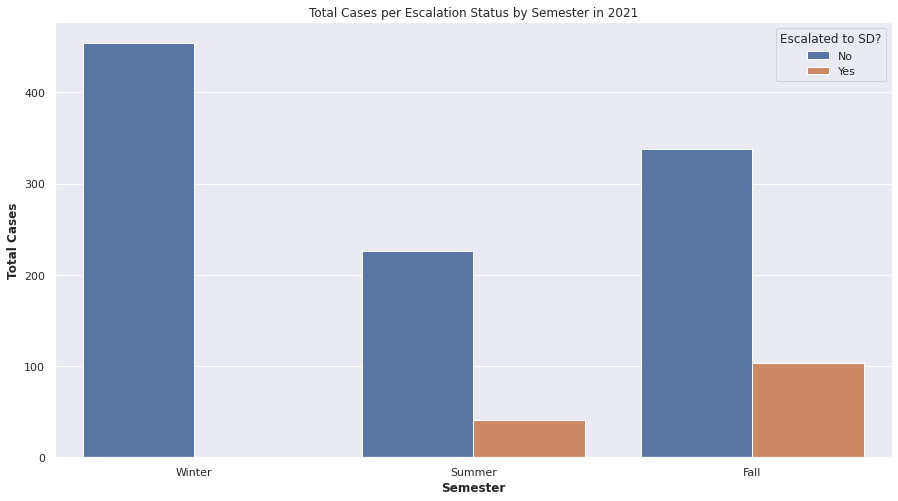

In [8]:
df_semester = pd.read_excel(escalationStatusDataPath, sheet_name="Semester");

def getBarChart_Semester(dataframe_semester, xColumn):
  dataframeTransposed_semester = getTransposedDataframe(dataframe_semester, "Escalated to SD?", xColumn);
  with sns.axes_style("darkgrid"):
      sns.set(rc = {'figure.figsize':(15,8)});
      chart = sns.barplot(data=dataframeTransposed_semester, x=xColumn, y="Total Cases", hue="Escalated to SD?");
      plt.xlabel(xColumn, fontweight="bold");
      plt.ylabel("Total Cases", fontweight="bold");
      plt.title(f"Total Cases per Escalation Status by {xColumn} in 2021");
      # plt.legend(title="Escalation Status");
  return chart;

getBarChart_Semester(df_semester, "Semester")

Month

<AxesSubplot:title={'center':'Total Cases per Escalation Status by Month in 2021'}, xlabel='Month', ylabel='Total Cases'>

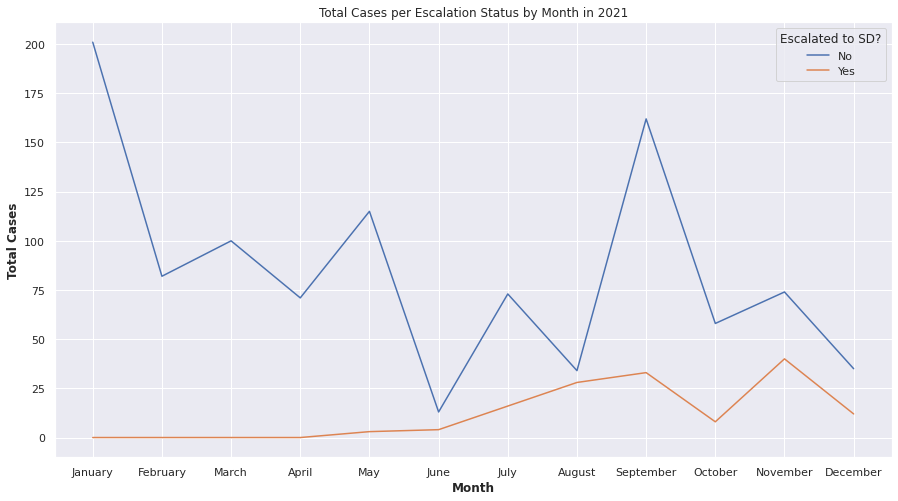

In [9]:
df_month = pd.read_excel(escalationStatusDataPath, sheet_name="Month");

def getLineChart_Month(dataframe_month, xColumn):
  dataframeTransposed_month = getTransposedDataframe(dataframe_month, "Escalated to SD?", xColumn);
  with sns.axes_style("darkgrid"):
      sns.set(rc = {'figure.figsize':(15,8)});
      chart = sns.lineplot(data=dataframeTransposed_month, x=xColumn, y="Total Cases", hue="Escalated to SD?");
      plt.xlabel(xColumn, fontweight="bold");
      plt.ylabel("Total Cases", fontweight="bold");
      plt.title(f"Total Cases per Escalation Status by {xColumn} in 2021");
      # plt.legend(title="Escalation Status");
  return chart;

getLineChart_Month(df_month, "Month")

Weekday

<AxesSubplot:title={'center':'Total Cases per Escalation Status by Weekday in 2021'}, xlabel='Weekday', ylabel='Total Cases'>

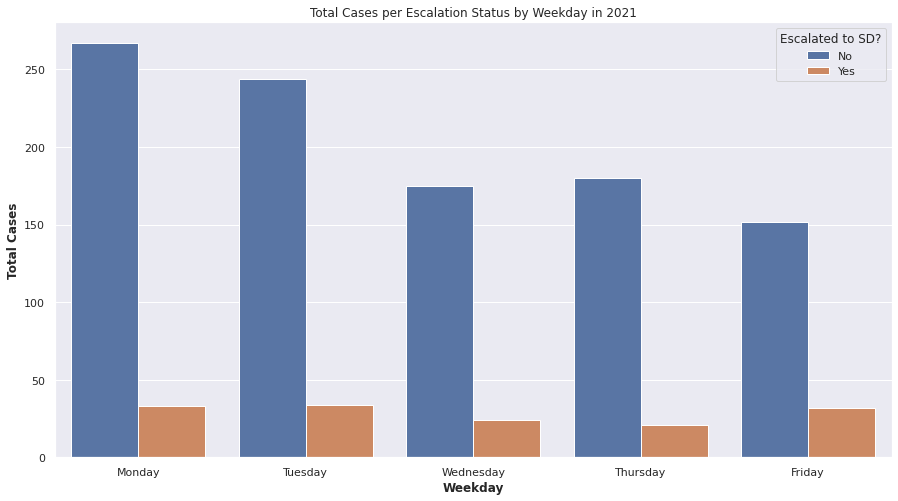

In [10]:
df_weekday = pd.read_excel(escalationStatusDataPath, sheet_name="Weekday");

def getBarChart_Weekday(dataframe_weekday, xColumn):
  dataframeTransposed_weekday = getTransposedDataframe(dataframe_weekday, "Escalated to SD?", xColumn);
  with sns.axes_style("darkgrid"):
      sns.set(rc = {'figure.figsize':(15,8)});
      chart = sns.barplot(data=dataframeTransposed_weekday, x=xColumn, y="Total Cases", hue="Escalated to SD?");
      plt.xlabel(xColumn, fontweight="bold");
      plt.ylabel("Total Cases", fontweight="bold");
      plt.title(f"Total Cases per Escalation Status by {xColumn} in 2021");
      # plt.legend(title="Escalation Status");
  return chart;

getBarChart_Weekday(df_weekday, "Weekday")

Weekday in Semester

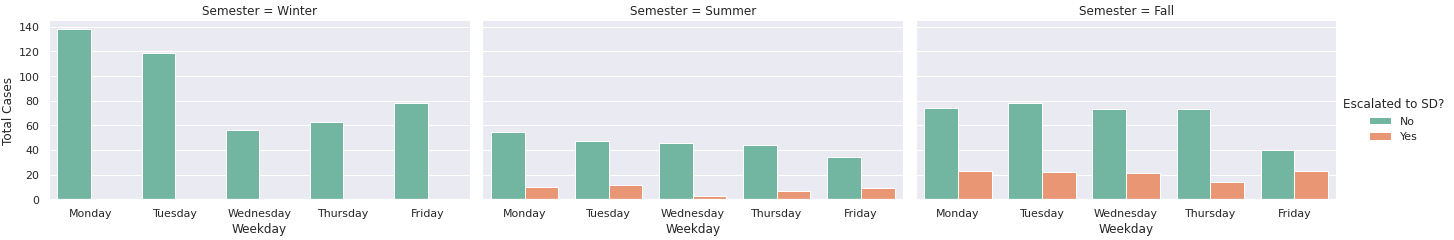

In [11]:
df_weekdayWinter = pd.read_excel(escalationStatusDataPath, sheet_name="Weekday - Winter");
df_weekdaySummer = pd.read_excel(escalationStatusDataPath, sheet_name="Weekday - Summer");
df_weekdayFall = pd.read_excel(escalationStatusDataPath, sheet_name="Weekday - Fall");

def getTotalCasesPerWeekdayInSemester(dataframeWinter, dataframeSummer, dataframeFall, xColumn, hueFacet):
  dataframeTransposed_winter = getTransposedDataframe(dataframeWinter, "Escalated to SD?", xColumn);
  dataframeTransposed_summer = getTransposedDataframe(dataframeSummer, "Escalated to SD?", xColumn);
  dataframeTransposed_fall = getTransposedDataframe(dataframeFall, "Escalated to SD?", xColumn);

  dataframeTransposed_winter[hueFacet] = "Winter";
  dataframeTransposed_summer[hueFacet] = "Summer";
  dataframeTransposed_fall[hueFacet] = "Fall";

  dataframeTransposedCombined = pd.concat([dataframeTransposed_winter,dataframeTransposed_summer,dataframeTransposed_fall]);
  cols = list(dataframeTransposedCombined.columns);
  cols = [cols[-1]] + cols[:-1];
  dataframeTransposedCombined = dataframeTransposedCombined[cols];

  return dataframeTransposedCombined;

# Reference: https://stackoverflow.com/questions/64783335/seaborn-facet-grid-col-not-creating-plots-side-by-side-in-jupyter-notebook

def getFacetGrid_Weekday_Semester(dataframeWinter, dataframeSummer, dataframeFall, xColumn, hueFacet):
  dataframeTransposed_timeOfDay_semester = getTotalCasesPerWeekdayInSemester(dataframeWinter, dataframeSummer, dataframeFall, xColumn, hueFacet);
  with sns.axes_style("darkgrid"):
    sns.set(rc = {'figure.figsize':(15,8)});
    chart = sns.FacetGrid(data=dataframeTransposed_timeOfDay_semester, height=3.5, aspect=1.8, col=hueFacet);
    chartCollection = chart.map_dataframe(sns.barplot, x=xColumn, y="Total Cases", hue="Escalated to SD?", palette="Set2");
    chart.add_legend(title="Escalated to SD?");
  return chart;

getFacetGrid_Weekday_Semester(df_weekdayWinter, df_weekdaySummer, df_weekdayFall, "Weekday", "Semester")

Week

/var/folders/6l/mm7mjc7502v12t9w6jsrkdcr0000gn/T/ipykernel_1695/3170238255.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator


<AxesSubplot:title={'center':'Total Cases per Escalation Status by Week in 2021'}, xlabel='Week', ylabel='Total Cases'>

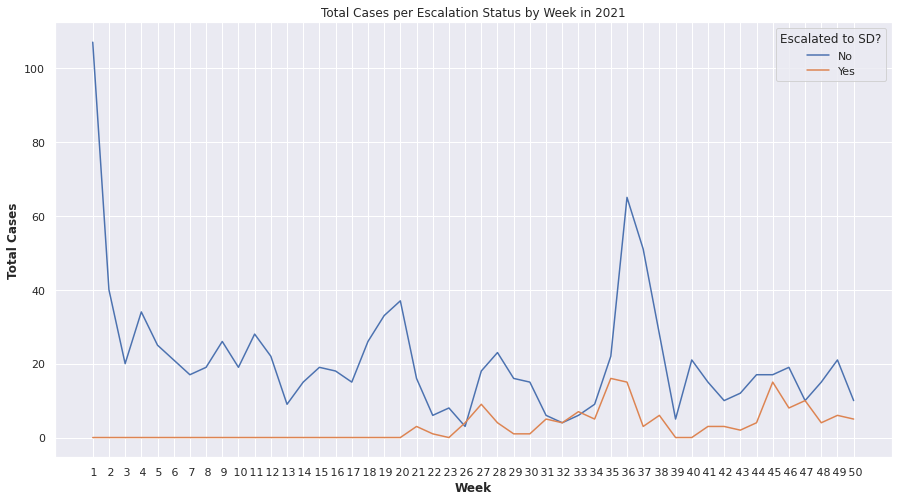

In [12]:
df_week = pd.read_excel(escalationStatusDataPath, sheet_name="Week");

# Reference: https://www.delftstack.com/howto/seaborn/set-axis-tick-labels-seaborn-python/

def getLineChart_Week(dataframe_week, xColumn):
  dataframeTransposed_week = getTransposedDataframe(dataframe_week, "Escalated to SD?", xColumn);
  with sns.axes_style("darkgrid"):
      sns.set(rc = {'figure.figsize':(15,8)});
      chart = sns.lineplot(data=dataframeTransposed_week, x=xColumn, y="Total Cases", hue="Escalated to SD?");
      plt.xlabel(xColumn, fontweight="bold");
      plt.ylabel("Total Cases", fontweight="bold");
      plt.title(f"Total Cases per Escalation Status by {xColumn} in 2021");
      xLabels = [];
      for tick in dataframeTransposed_week[xColumn].unique().tolist():
        xLabels.append(tick[4:]);
      chart.set_xticklabels(xLabels);
  return chart;

getLineChart_Week(df_week, "Week")

Time Range

<AxesSubplot:title={'center':'Total Cases per Escalation Status by Time Range in 2021'}, xlabel='Time Range', ylabel='Total Cases'>

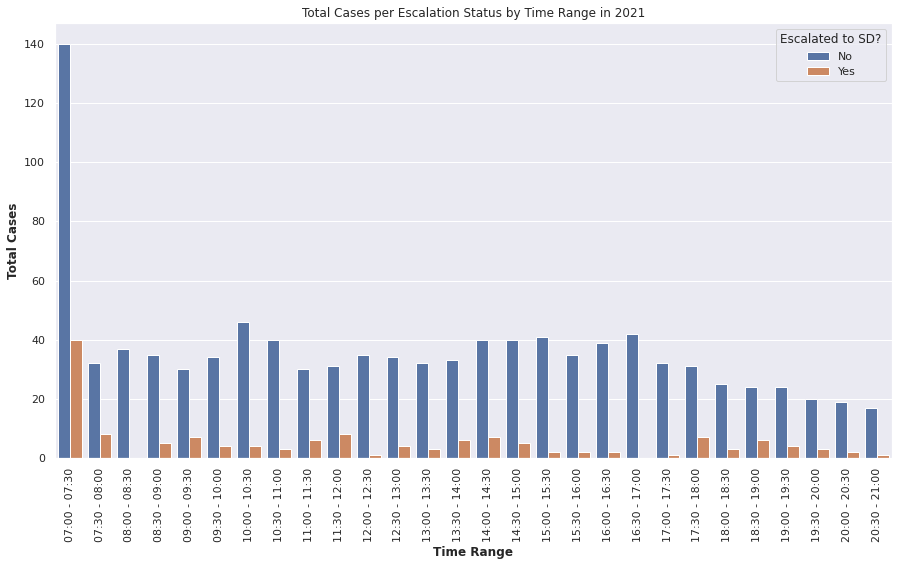

In [13]:
df_timeRange = pd.read_excel(escalationStatusDataPath, sheet_name="Time Range");

def getBarChart_TimeRange(dataframe_timeRange, xColumn):
  dataframeTransposed_timeRange = getTransposedDataframe(dataframe_timeRange, "Escalated to SD?", xColumn);
  with sns.axes_style("darkgrid"):
      sns.set(rc = {'figure.figsize':(15,8)});
      chart = sns.barplot(data=dataframeTransposed_timeRange, x=xColumn, y="Total Cases", hue="Escalated to SD?");
      plt.xlabel(xColumn, fontweight="bold");
      plt.ylabel("Total Cases", fontweight="bold");
      plt.title(f"Total Cases per Escalation Status by {xColumn} in 2021");
      # plt.legend(title="Escalation Status");
      plt.xticks(rotation=90);
  return chart;

getBarChart_TimeRange(df_timeRange, "Time Range")

Time of Day

<AxesSubplot:title={'center':'Total Cases per Escalation Status by Time of Day in 2021'}, xlabel='Time of Day', ylabel='Total Cases'>

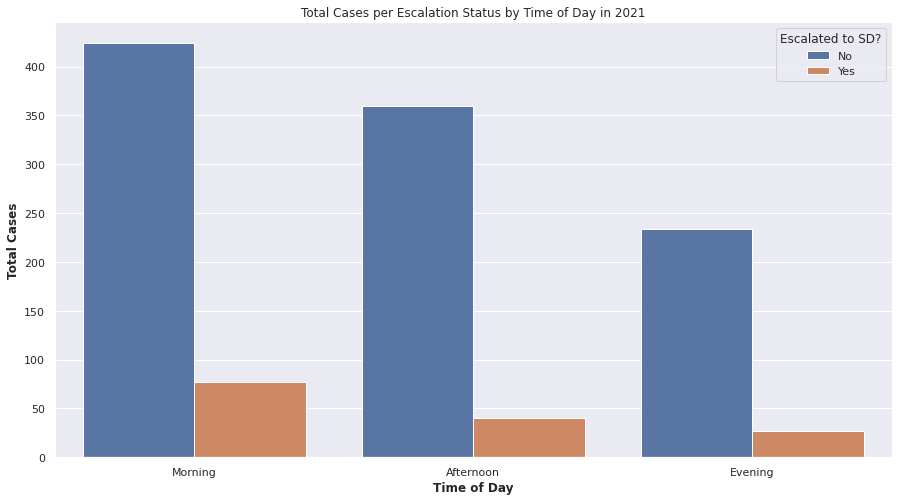

In [14]:
df_timeOfDay = pd.read_excel(escalationStatusDataPath, sheet_name="Time of Day");

def getBarChart_TimeOfDay(dataframe_timeOfDay, xColumn):
  dataframeTransposed_timeOfDay = getTransposedDataframe(dataframe_timeOfDay, "Escalated to SD?", xColumn);
  with sns.axes_style("darkgrid"):
      sns.set(rc = {'figure.figsize':(15,8)});
      chart = sns.barplot(data=dataframeTransposed_timeOfDay, x=xColumn, y="Total Cases", hue="Escalated to SD?");
      plt.xlabel(xColumn, fontweight="bold");
      plt.ylabel("Total Cases", fontweight="bold");
      plt.title(f"Total Cases per Escalation Status by {xColumn} in 2021");
  return chart;

getBarChart_TimeOfDay(df_timeOfDay, "Time of Day")

Time Range in Semester

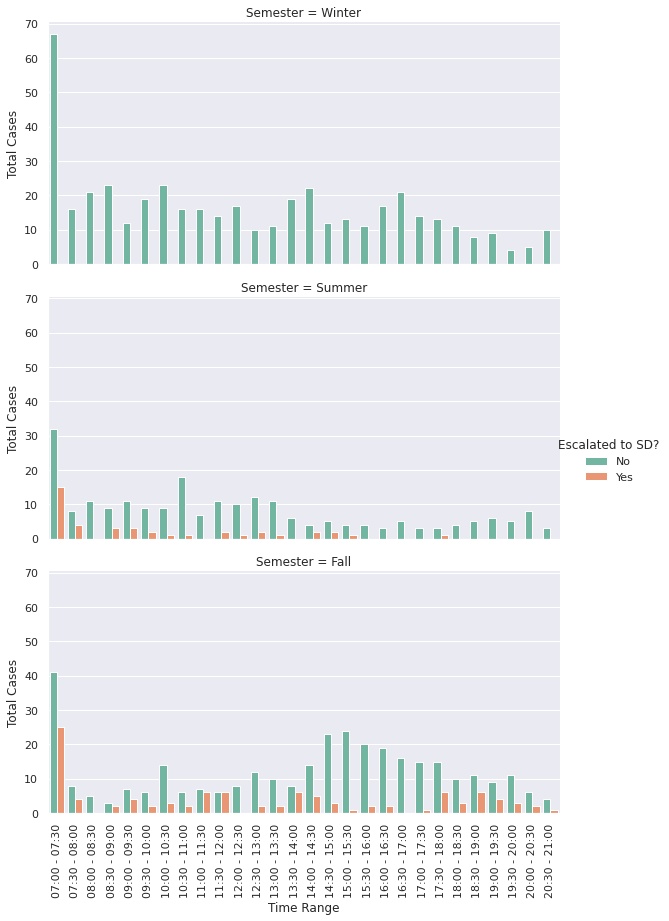

In [15]:
df_timeRangeWinter = pd.read_excel(escalationStatusDataPath, sheet_name="Time Range - Winter");
df_timeRangeSummer = pd.read_excel(escalationStatusDataPath, sheet_name="Time Range - Summer");
df_timeRangeFall = pd.read_excel(escalationStatusDataPath, sheet_name="Time Range - Fall");

def getTotalCasesPerTimeRangeInSemester(dataframeWinter, dataframeSummer, dataframeFall, xColumn, hueFacet):
  dataframeTransposed_winter = getTransposedDataframe(dataframeWinter, "Escalated to SD?", xColumn);
  dataframeTransposed_summer = getTransposedDataframe(dataframeSummer, "Escalated to SD?", xColumn);
  dataframeTransposed_fall = getTransposedDataframe(dataframeFall, "Escalated to SD?", xColumn);

  dataframeTransposed_winter[hueFacet] = "Winter";
  dataframeTransposed_summer[hueFacet] = "Summer";
  dataframeTransposed_fall[hueFacet] = "Fall";

  dataframeTransposedCombined = pd.concat([dataframeTransposed_winter,dataframeTransposed_summer,dataframeTransposed_fall]);
  cols = list(dataframeTransposedCombined.columns);
  cols = [cols[-1]] + cols[:-1];
  dataframeTransposedCombined = dataframeTransposedCombined[cols];

  return dataframeTransposedCombined;

# getTotalCasesPerTimeRangeInSemester(df_timeRangeWinter, df_timeRangeSummer, df_timeRangeFall, "Time Range", "Semester")

def getFacetGrid_TimeRange_Semester(dataframeWinter, dataframeSummer, dataframeFall, xColumn, hueFacet):
  dataframeTransposed_timeRange_semester = getTotalCasesPerTimeRangeInSemester(dataframeWinter, dataframeSummer, dataframeFall, xColumn, hueFacet);
  with sns.axes_style("darkgrid"):
    sns.set(rc = {'figure.figsize':(15,8)});
    chart = sns.FacetGrid(data=dataframeTransposed_timeRange_semester, height=4, aspect=2, row=hueFacet);
    chartCollection = chart.map_dataframe(sns.barplot, x=xColumn, y="Total Cases", hue="Escalated to SD?", palette="Set2");
    chart.add_legend(title="Escalated to SD?");
    for axes in chart.axes.flat:
      _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=90);
  return chart;

getFacetGrid_TimeRange_Semester(df_timeRangeWinter, df_timeRangeSummer, df_timeRangeFall, "Time Range", "Semester")

Time of Day in Semester

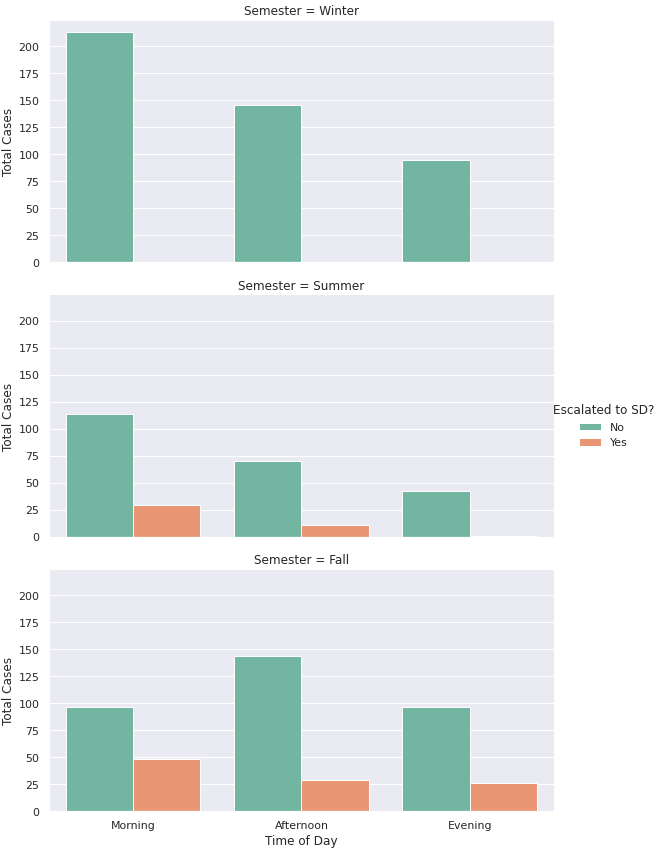

In [16]:
df_timeOfDayWinter = pd.read_excel(escalationStatusDataPath, sheet_name="Time of Day - Winter");
df_timeOfDaySummer = pd.read_excel(escalationStatusDataPath, sheet_name="Time of Day - Summer");
df_timeOfDayFall = pd.read_excel(escalationStatusDataPath, sheet_name="Time of Day - Fall");

def getTotalCasesPerTimeOfDayInSemester(dataframeWinter, dataframeSummer, dataframeFall, xColumn, hueFacet):
  dataframeTransposed_winter = getTransposedDataframe(dataframeWinter, "Escalated to SD?", xColumn);
  dataframeTransposed_summer = getTransposedDataframe(dataframeSummer, "Escalated to SD?", xColumn);
  dataframeTransposed_fall = getTransposedDataframe(dataframeFall, "Escalated to SD?", xColumn);

  dataframeTransposed_winter[hueFacet] = "Winter";
  dataframeTransposed_summer[hueFacet] = "Summer";
  dataframeTransposed_fall[hueFacet] = "Fall";

  dataframeTransposedCombined = pd.concat([dataframeTransposed_winter,dataframeTransposed_summer,dataframeTransposed_fall]);
  cols = list(dataframeTransposedCombined.columns);
  cols = [cols[-1]] + cols[:-1];
  dataframeTransposedCombined = dataframeTransposedCombined[cols];

  return dataframeTransposedCombined;

# getTotalCasesPerTimeOfDayInSemester(df_timeOfDayWinter, df_timeOfDaySummer, df_timeOfDayFall, "Time of Day", "Semester")

def getFacetGrid_TimeOfDay_Semester(dataframeWinter, dataframeSummer, dataframeFall, xColumn, hueFacet):
  dataframeTransposed_timeRange_semester = getTotalCasesPerTimeOfDayInSemester(dataframeWinter, dataframeSummer, dataframeFall, xColumn, hueFacet);
  with sns.axes_style("darkgrid"):
    sns.set(rc = {'figure.figsize':(15,8)});
    chart = sns.FacetGrid(data=dataframeTransposed_timeRange_semester, height=4, aspect=2, row=hueFacet);
    chartCollection = chart.map_dataframe(sns.barplot, x=xColumn, y="Total Cases", hue="Escalated to SD?", palette="Set2");
    chart.add_legend(title="Escalated to SD?");
    # for axes in chart.axes.flat:
    #   _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=90);
  return chart;

getFacetGrid_TimeOfDay_Semester(df_timeOfDayWinter, df_timeOfDaySummer, df_timeOfDayFall, "Time of Day", "Semester")

Task Category

<AxesSubplot:title={'center':'Total Cases per Escalation Status by Task Category in 2021'}, xlabel='Total Cases', ylabel='Task Category'>

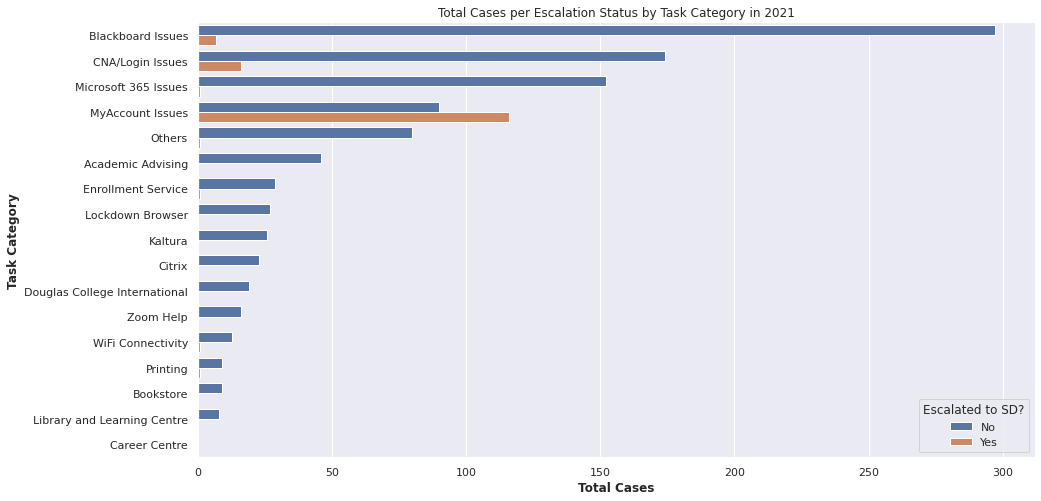

In [17]:
df_taskCategory = pd.read_excel(escalationStatusDataPath, sheet_name="Task Category");

def getBarChart_TaskCategory(dataframe_taskCategory, xColumn):
  dataframeTransposed_taskCategory = getTransposedDataframe(dataframe_taskCategory, "Escalated to SD?", xColumn);
  dataframeTransposed_taskCategory = dataframeTransposed_taskCategory.sort_values("Total Cases", ascending=False);
  with sns.axes_style("darkgrid"):
      sns.set(rc = {'figure.figsize':(15,8)});
      chart = sns.barplot(data=dataframeTransposed_taskCategory, x="Total Cases", y=xColumn, hue="Escalated to SD?", orient="h");
      plt.xlabel("Total Cases", fontweight="bold");
      plt.ylabel(xColumn, fontweight="bold");
      plt.title(f"Total Cases per Escalation Status by {xColumn} in 2021");
  return chart;

getBarChart_TaskCategory(df_taskCategory, "Task Category")

Task Category in Semester

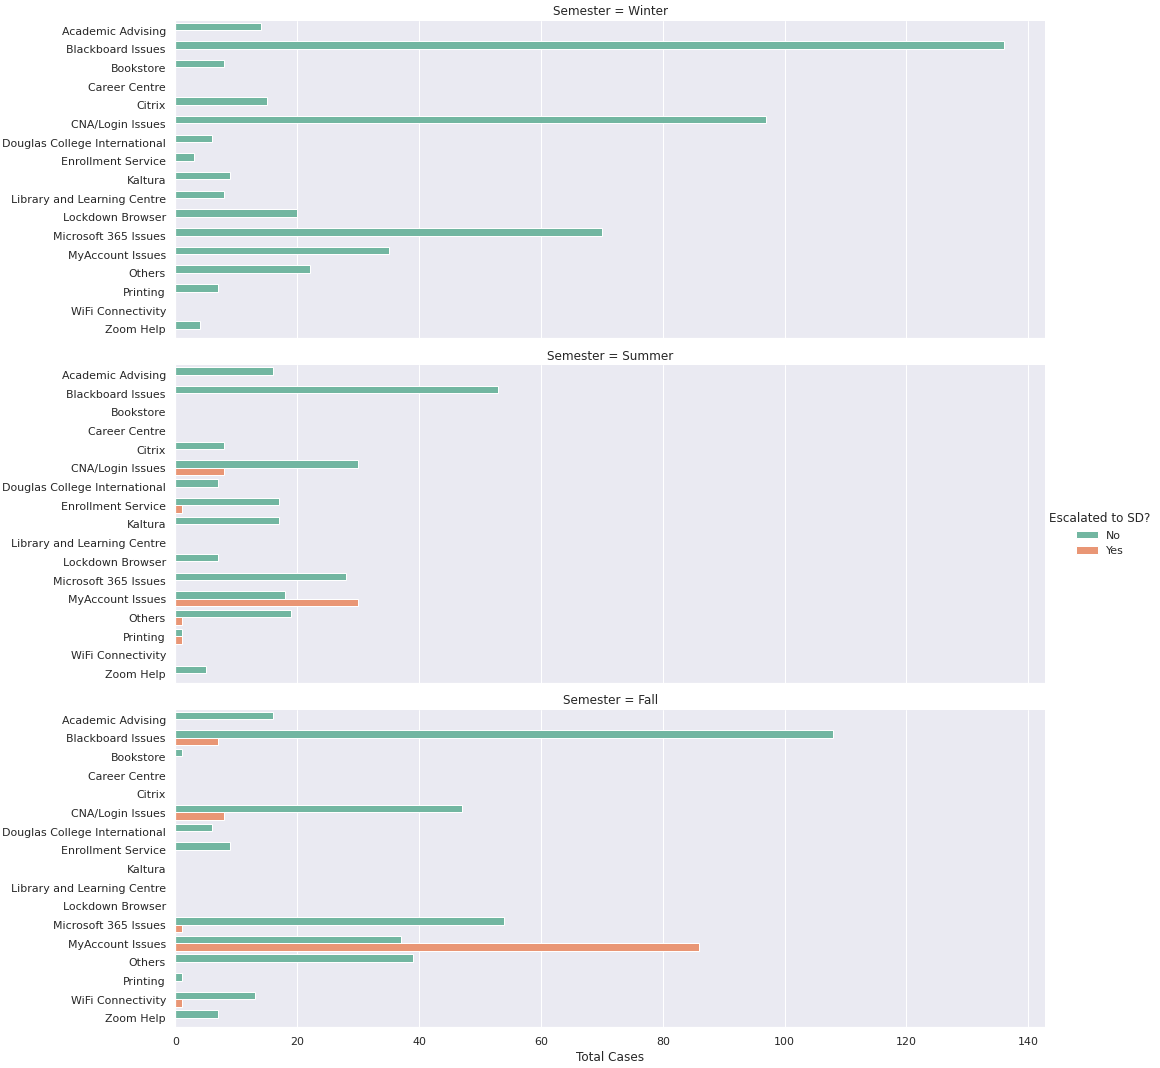

In [18]:
df_taskCategoryWinter = pd.read_excel(escalationStatusDataPath, sheet_name="Task Category - Winter");
df_taskCategorySummer = pd.read_excel(escalationStatusDataPath, sheet_name="Task Category - Summer");
df_taskCategoryFall = pd.read_excel(escalationStatusDataPath, sheet_name="Task Category - Fall");

def getTotalCasesPerTaskCategoryInSemester(dataframeWinter, dataframeSummer, dataframeFall, xColumn, hueFacet):
  dataframeTransposed_winter = getTransposedDataframe(dataframeWinter, "Escalated to SD?", xColumn);
  dataframeTransposed_summer = getTransposedDataframe(dataframeSummer, "Escalated to SD?", xColumn);
  dataframeTransposed_fall = getTransposedDataframe(dataframeFall, "Escalated to SD?", xColumn);

  dataframeTransposed_winter[hueFacet] = "Winter";
  dataframeTransposed_summer[hueFacet] = "Summer";
  dataframeTransposed_fall[hueFacet] = "Fall";

  dataframeTransposedCombined = pd.concat([dataframeTransposed_winter,dataframeTransposed_summer,dataframeTransposed_fall]);
  cols = list(dataframeTransposedCombined.columns);
  cols = [cols[-1]] + cols[:-1];
  dataframeTransposedCombined = dataframeTransposedCombined[cols];

  return dataframeTransposedCombined;

# getTotalCasesPerTaskCategoryInSemester(df_taskCategoryWinter, df_taskCategorySummer, df_taskCategoryFall, "Task Category", "Semester")

def getFacetGrid_TaskCategory_Semester(dataframeWinter, dataframeSummer, dataframeFall, xColumn, hueFacet):
  dataframeTransposed_taskCategory_semester = getTotalCasesPerTaskCategoryInSemester(dataframeWinter, dataframeSummer, dataframeFall, xColumn, hueFacet);
  # dataframeTransposed_taskCategory_semester = dataframeTransposed_taskCategory_semester.sort_values(["Semester","Total Cases"], ascending=False);
  with sns.axes_style("darkgrid"):
    sns.set(rc = {'figure.figsize':(15,8)});
    chart = sns.FacetGrid(data=dataframeTransposed_taskCategory_semester, height=5, aspect=3, row=hueFacet);
    chartCollection = chart.map_dataframe(sns.barplot, x="Total Cases", y=xColumn, hue="Escalated to SD?", palette="Set2", orient="h");
    chart.add_legend(title="Escalated to SD?");
    # for axes in chart.axes.flat:
    #   _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=90);
  return chart;

getFacetGrid_TaskCategory_Semester(df_taskCategoryWinter, df_taskCategorySummer, df_taskCategoryFall, "Task Category", "Semester")